<a href="https://colab.research.google.com/github/safakozdek/CMPE462-Machine-Learning-Homeworks/blob/master/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CMPE 462 HOMEWORK 1
Due Date: 21.03.2019

In [0]:
# Allowed libraries
import numpy as np
import matplotlib.pyplot as plt
# For loading data, you can import other libraries, but further usage is not allowed.

### 1.) Review bias/variance dilemma.
Replicate the bias-variance-plot (bias,
variance and error vs. model complexity) given in Figure 4.6 in the textbook
or in lecture notes [W04.pdf, pg.52]. For this:

* Generate 20 values {$x^t$} from the range [0, 5] from uniform distribution.  
* Generate 100 different samples $X_s$. Each sample contains 20 instances {$x^t, y^t_s$} where $y^t_s = f(x^t) + \epsilon$, $f(x) =2× sin(1.5 × x)$, and $ \epsilon ∼ N (0, 1)$.
* For each sample, fit polynomial models of order 1,3, and 5.
* Plot bias, variance and error of these models.

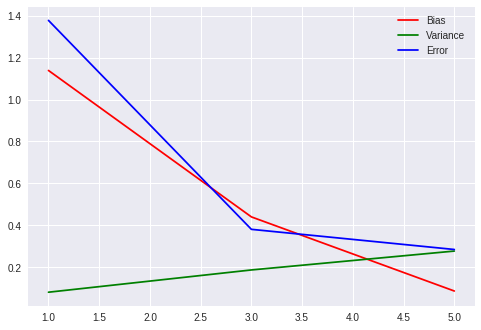

In [0]:
np.random.seed(119)

def getW(r,order):
    global xt
    r.reshape(20,1)
    D = np.ones_like(r)
    for i in range(order):
        D = np.column_stack((D, xt**(i+1)))
    return np.dot(np.dot(np.linalg.inv(np.dot(D.T, D)), D.T), r)


#Generate Data
xt = np.random.uniform(0, 5, size=(20,1))
y = np.sin(1.5*xt) * 2
yt = y + np.random.normal(0, 1, size=y.shape)
for i in range(99):
    yt = np.column_stack((yt,y + np.random.normal(0, 1, size=y.shape)))

w1 = getW(yt.T[0], 1)
w3 = getW(yt.T[0], 3)
w5 = getW(yt.T[0], 5)
for i in range(99):
    w1 = np.column_stack((w1, getW(yt.T[i+1], 1)))
    w3 = np.column_stack((w3, getW(yt.T[i+1], 3)))
    w5 = np.column_stack((w5, getW(yt.T[i+1], 5)))

w1mean = np.mean(w1,axis=1)
w3mean = np.mean(w3,axis=1)
w5mean = np.mean(w5,axis=1)

g1 = w1mean[0] + xt*w1mean[1]
g3 = w3mean[0] + w3mean[1]*xt + w3mean[2]*(xt**2) + w3mean[3]*(xt**3)
g5 = w5mean[0] + w5mean[1]*xt + w5mean[2]*(xt**2) + w5mean[3]*(xt**3) + w5mean[4]*(xt**4) + w5mean[5]*(xt**5)

bias1 = np.sqrt(np.sum((g1-y)**2) / 20)
bias3 = np.sqrt(np.sum((g3-y)**2) / 20)
bias5 = np.sqrt(np.sum((g5-y)**2) / 20)

var1 = 0
var3 = 0
var5 = 0
for i in range(100):
    gi1 = w1[0][i] + xt * w1[1][i]
    gi3 = w3[0][i] + w3[1][i]*xt + w3[2][i]*(xt**2) + w3[3][i]*(xt**3)
    gi5 = w5[0][i] + w5[1][i]*xt + w5[2][i]*(xt**2) + w5[3][i]*(xt**3) + w5[4][i]*(xt**4) + w5[5][i]*(xt**5)
    var1 = var1 + np.sum((gi1-g1)**2)
    var3 = var3 + np.sum((gi3-g3)**2)
    var5 = var5 + np.sum((gi5-g5)**2)

var1 =var1 / 2000 # * (1 / NM)
var3 =var3 / 2000
var5 =var5 / 2000
err1 = bias1**2 + var1
err3 = bias3**2 + var3
err5 = bias5**2 + var5

orders = [1,3,5]
plt.plot(orders, [bias1, bias3, bias5], label='Bias', color='r')
plt.plot(orders, [var1, var3, var5], label='Variance', color='g')
plt.plot(orders, [err1, err3, err5], label='Error', color='b')
plt.legend(loc='best')
plt.show()

### 2.) Review cross-validation.
Replicate the cross-validation error plot (training and validation error vs. model complexity plot) given in Figure 4.7 in the textbook or in lecture notes [W04.pdf, pg52]. For this:
* Generate 10 samples containing 100 instances as in part 1.
* Split each sample to training and validation sets, fit polynomial models of order 1,3, and 5.
* Plot mean training and validation error (mean square error) of each model.

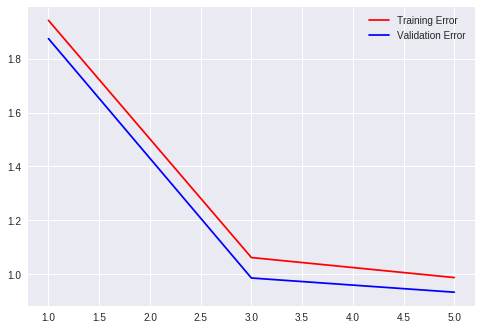

In [0]:
def getW2(r,order):
    global xt
    r.reshape(10,1)
    D = np.ones_like(r)
    for i in range(order):
        D = np.column_stack((D, xt**(i+1)))
    return np.dot(np.dot(np.linalg.inv(np.dot(D.T, D)), D.T), r)

xt = np.random.uniform(0, 5, size=(10,1))
y = np.sin(1.5*xt) * 2
yt = y + np.random.normal(0, 1, size=y.shape)
for i in range(99):
    yt = np.column_stack((yt,y + np.random.normal(0, 1, size=y.shape)))
training = yt.T[0:70].T
validation = yt.T[70:100].T

w1 = getW2(training.T[0], 1)
w3 = getW2(training.T[0], 3)
w5 = getW2(training.T[0], 5)
for i in range(69):
    w1 = np.column_stack((w1, getW2(training.T[i + 1], 1)))
    w3 = np.column_stack((w3, getW2(training.T[i + 1], 3)))
    w5 = np.column_stack((w5, getW2(training.T[i + 1], 5)))

w1mean = np.mean(w1,axis=1)
w3mean = np.mean(w3,axis=1)
w5mean = np.mean(w5,axis=1)

g1 = w1mean[0] + xt*w1mean[1]
g3 = w3mean[0] + w3mean[1]*xt + w3mean[2]*(xt**2) + w3mean[3]*(xt**3)
g5 = w5mean[0] + w5mean[1]*xt + w5mean[2]*(xt**2) + w5mean[3]*(xt**3) + w5mean[4]*(xt**4) + w5mean[5]*(xt**5)

trainErr1 = np.sum((g1 - training) ** 2 / 700)
trainErr3 = np.sum((g3 - training) ** 2 / 700)
trainErr5 = np.sum((g5 - training) ** 2 / 700)

validErr1 = np.sum((g1 - validation) ** 2 / 300)
validErr3 = np.sum((g3 - validation) ** 2 / 300)
validErr5 = np.sum((g5 - validation) ** 2 / 300)

plt.plot([1,3,5], [trainErr1, trainErr3, trainErr5], color='r', label='Training Error')
plt.plot([1,3,5], [validErr1, validErr3, validErr5], color='b', label='Validation Error')
plt.legend(loc='best')
plt.show()

### 3.) Use of real dataset. 
Download Iris Data Set from UCI Machine Learning Repository. Randomly split it into training and test sets.
* For each feature, plot histogram of classes. For better visualiziation, plot classes in same plot but with different colors. (For this you can use plt.subplots)
* Consider only two classes: Iris Setosa and Iris Versicolour.
* Assuming Gaussian distribution, apply parametric classification, and find which particular feature (sepal length, sepal width, petal length, petal width) is most successful in classifying instances.
    - For this, treat each feature separately. find maximum likelihood estimate of the parameters $(μ, σ^2)$ of different classes using training set. (You can use plt.errorbar for visualization, use one column for each feature and visualize both classes in same plot using different colors).
    - Using these parameters, predict the classes of the instances in the test set, and calculate the error.

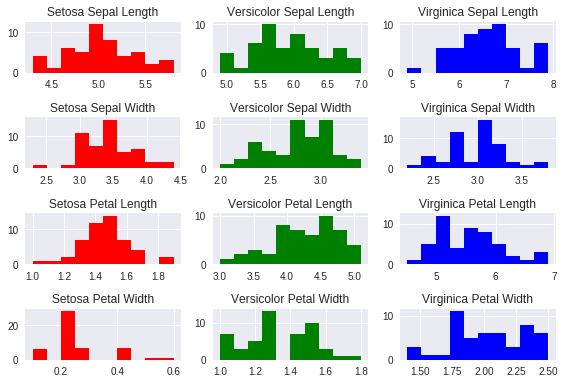

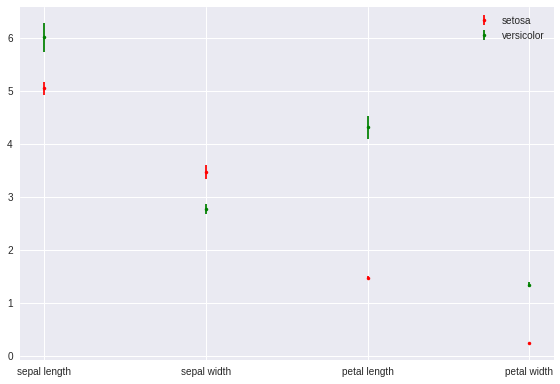

Error for Sepal Length: 0.13333333333333333
Error for Sepal Width: 0.16666666666666666
Error for Petal Length: 0.0
Error for Petal Width: 0.0
So the best ones are Petal Length and Petal Width.


In [0]:
import pandas as pd

#read data
filename="iris.csv"
dataset = pd.read_csv(filename)

#histograms
setosa=dataset[dataset['species'] == 'setosa']
versicolor = dataset[dataset['species'] == 'versicolor']
virginica = dataset[dataset['species'] == 'virginica']

plt.subplot(4,3,1)
plt.hist(setosa[setosa.columns[0]], color='r', label='setosa')
plt.title('Setosa Sepal Length')
plt.subplot(4,3,2)
plt.hist(versicolor[versicolor.columns[0]], color='g', label='versicolor')
plt.title('Versicolor Sepal Length')
plt.subplot(4,3,3)
plt.hist(virginica[virginica.columns[0]], color='b', label='virginica')
plt.title('Virginica Sepal Length')

plt.subplot(4,3,4)
plt.hist(setosa[setosa.columns[1]], color='r', label='setosa')
plt.title('Setosa Sepal Width')
plt.subplot(4,3,5)
plt.hist(versicolor[versicolor.columns[1]], color='g', label='versicolor')
plt.title('Versicolor Sepal Width')
plt.subplot(4,3,6)
plt.hist(virginica[virginica.columns[1]], color='b', label='virginica')
plt.title('Virginica Sepal Width')

plt.subplot(4,3,7)
plt.hist(setosa[setosa.columns[2]], color='r', label='setosa')
plt.title('Setosa Petal Length')
plt.subplot(4,3,8)
plt.hist(versicolor[versicolor.columns[2]], color='g', label='versicolor')
plt.title('Versicolor Petal Length')
plt.subplot(4,3,9)
plt.hist(virginica[virginica.columns[2]], color='b', label='virginica')
plt.title('Virginica Petal Length')

plt.subplot(4,3,10)
plt.hist(setosa[setosa.columns[3]], color='r', label='setosa')
plt.title('Setosa Petal Width')
plt.subplot(4,3,11)
plt.hist(versicolor[versicolor.columns[3]], color='g', label='versicolor')
plt.title('Versicolor Petal Width')
plt.subplot(4,3,12)
plt.hist(virginica[virginica.columns[3]], color='b', label='virginica')
plt.title('Virginica Petal Width')
plt.tight_layout()
plt.show()

#Parametric Classification

training_setosa = setosa.iloc[:35, 0:4]
validation_setosa = setosa.iloc[35:, 0:4]

training_versicolor = versicolor.iloc[:35, 0:4]
validation_versicolor = versicolor.iloc[35:, 0:4]

mean_setosa = np.mean(training_setosa)
mean_versicolor = np.mean(training_versicolor)

var_setosa = np.mean((training_setosa-mean_setosa)**2)
var_versicolor = np.mean((training_versicolor-mean_versicolor)**2)

plt.errorbar(["sepal length","sepal width","petal length","petal width"], mean_setosa, yerr=var_setosa,  fmt='.', color='red', ecolor='red', label='setosa')
plt.errorbar(["sepal length","sepal width","petal length","petal width"], mean_versicolor, yerr=var_versicolor, fmt='.', color='green', ecolor='green', label='versicolor')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#Error Validation

validation_data = setosa.iloc[35:, 0:4].append(versicolor.iloc[35:, 0:4])
validation_data_species = setosa.iloc[35:, 4].append(versicolor.iloc[35:, 4])
g_setosa = -1 * np.log(var_setosa) / 2 - (validation_data - mean_setosa)**2 / (2 * var_setosa)
g_versicolor = -1 * np.log(var_versicolor) / 2 - (validation_data - mean_versicolor)**2 / (2 * var_versicolor)
diff = g_setosa - g_versicolor
predictions = np.reshape(['setosa' if x>0 else 'versicolor' for x in diff.iloc[:,0]], (30,1))
for i in range(3):
    predictions = np.column_stack((predictions, np.reshape(['setosa' if x > 0 else 'versicolor' for x in diff.iloc[:, i+1]], (30, 1))))

err = [0 if validation_data_species.iloc[j] == predictions[j][0] else 1 for j in range(30)]
for i in range(3):
    err = np.column_stack((err, [0 if validation_data_species.iloc[j] == predictions[j,i+1] else 1 for j in range(30)]))
err = np.mean(err, axis=0)

print('Error for Sepal Length: ' + str(err[0]))
print('Error for Sepal Width: ' + str(err[1]))
print('Error for Petal Length: ' + str(err[2]))
print('Error for Petal Width: ' + str(err[3]))

print("So the best ones are Petal Length and Petal Width.")
